Importing from kaggle

In [5]:
import os
import shutil


In [6]:

# Create .kaggle directory
kaggle_dir = os.path.join(os.path.expanduser("~"), '.kaggle')
os.makedirs(kaggle_dir, exist_ok=True)

# Copy kaggle.json to .kaggle directory
shutil.copy('kaggle.json', os.path.join(kaggle_dir, 'kaggle.json'))

# Set permissions
os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)


In [7]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = 'face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
#list of file
!dir

 Volume in drive C is OS
 Volume Serial Number is 2445-3D95

 Directory of c:\Users\saksh\OneDrive\Documents\VIT\placement\projects

25-09-2024  11:45 PM    <DIR>          .
17-09-2024  05:38 PM    <DIR>          ..
25-09-2024  11:45 PM    <DIR>          data
31-07-2020  06:35 PM       171,127,690 face-mask-dataset.zip
29-09-2024  04:13 PM           332,297 face_mask_detection.ipynb
25-09-2024  10:23 PM                69 kaggle.json
23-09-2024  09:20 PM               906 logistic_regression_model.pkl
23-09-2024  09:20 PM               943 naive_bayes_model.pkl
23-09-2024  09:20 PM         2,137,432 random_forest_model.pkl
23-09-2024  11:22 PM             1,382 records.sql
23-09-2024  11:22 PM            17,106 record_manager.py
23-09-2024  08:55 PM                27 tempCodeRunnerFile.py
22-09-2024  03:41 PM             1,616 tempCodeRunnerFile.python
23-09-2024  10:26 PM           255,891 titanic.ipynb
23-09-2024  09:02 PM             5,201 titanic_host.py
17-09-2024  01:20 PM        

#### Importing Libraries

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
import cv2
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split

#(pip install opencv-python)

In [11]:

with_mask_files=os.listdir('data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [12]:
without_mask_files=os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [13]:
print("Number of with mask images: ", len(with_mask_files))
print("Number of without mask images: ", len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


### Creating Labels

In [14]:
#Creating labels for the two classes: with mask - 1, without mask - 0
with_mask_labels=[1] *3725 # multiply w size of classes
without_mask_labels=[0]*3828

In [15]:

print(with_mask_labels[0:5])
print(without_mask_labels[0:5])
print(len(with_mask_labels))
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [16]:
#combining both labels
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Displaying images

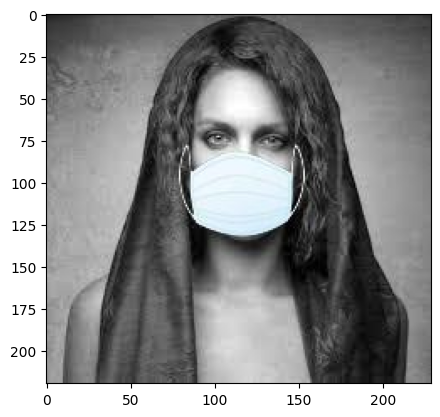

In [17]:

#displaying masked image
img= mpimg.imread('data/with_mask/with_mask_1320.jpg')
imgplot=plt.imshow(img)
plt.show()

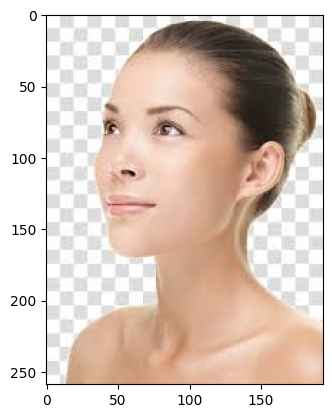

In [18]:
#displaying  without mask image
img= mpimg.imread('data/without_mask/without_mask_2925.jpg')
imgplot=plt.imshow(img)
plt.show()

### Image Processing

In [19]:
#Image processing: Resize image, convert images to numpy arrays
#convert image to np arrays

with_mask_path='data/with_mask/'

data=[]

for img_file in with_mask_files:
    image=  Image.open(with_mask_path+ img_file)
    image=image.resize((128,128))
    image=image.convert('RGB') #some are grayscale, some rgb, making all rgb
    image=np.array(image)
    data.append(image)

c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
#convert image to np arrays

without_mask_path='data/without_mask/'

for img_file in without_mask_files:
    image=  Image.open(without_mask_path+ img_file)
    image=image.resize((128,128))
    image=image.convert('RGB') #some are grayscale, some rgb, making all rgb
    image=np.array(image)
    data.append(image)

In [21]:
data[0]


array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [22]:
type(data[0])


numpy.ndarray

In [23]:
data[0].shape


(128, 128, 3)

In [24]:
#converting image list( i.e. data list) and labels list into numpy array
X=np.array(data)
y=np.array(labels)

In [25]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [26]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(y)


[1 1 1 ... 0 0 0]


In [28]:
X_train , X_test, y_train, y_test =train_test_split(X, y , test_size=0.2, random_state=2)


In [29]:
print(X.shape, X_train.shape, X_test.shape)


(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [31]:
print(X_train_scaled[0])


[[[0.88627451 0.91764706 0.78823529]
  [0.82745098 0.84705882 0.7372549 ]
  [0.7372549  0.7372549  0.6627451 ]
  ...
  [0.72941176 0.70980392 0.64705882]
  [0.70196078 0.68627451 0.58823529]
  [0.65098039 0.70980392 0.53333333]]

 [[0.87843137 0.89411765 0.85490196]
  [0.78823529 0.8        0.76470588]
  [0.78823529 0.78039216 0.75294118]
  ...
  [0.77254902 0.74509804 0.71372549]
  [0.68627451 0.66666667 0.6       ]
  [0.63529412 0.70588235 0.56078431]]

 [[0.80392157 0.8        0.83137255]
  [0.86666667 0.8627451  0.88627451]
  [0.76470588 0.75294118 0.76862745]
  ...
  [0.71764706 0.68235294 0.67843137]
  [0.6745098  0.65490196 0.62352941]
  [0.70980392 0.78039216 0.67058824]]

 ...

 [[0.61176471 0.69019608 0.77254902]
  [0.62352941 0.70588235 0.76862745]
  [0.64313725 0.7254902  0.76862745]
  ...
  [0.34901961 0.38823529 0.27843137]
  [0.41568627 0.44313725 0.3254902 ]
  [0.38823529 0.40392157 0.26666667]]

 [[0.59215686 0.69411765 0.76862745]
  [0.65490196 0.74509804 0.81568627]


### Building the CNN

In [32]:
import tensorflow as tf 
from tensorflow import keras 

In [33]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) #input shape only added n first
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) #output layer

c:\Users\saksh\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [35]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 98s 598ms/step - acc: 0.6801 - loss: 0.7599 - val_acc: 0.9016 - val_loss: 0.2644
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 90s 589ms/step - acc: 0.8760 - loss: 0.3005 - val_acc: 0.9065 - val_loss: 0.2292
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 91s 597ms/step - acc: 0.9016 - loss: 0.2688 - val_acc: 0.9222 - val_loss: 0.2005
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 107s 704ms/step - acc: 0.9219 - loss: 0.1947 - val_acc: 0.9338 - val_loss: 0.1917
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 120s 792ms/step - acc: 0.9381 - loss: 0.1725 - val_acc: 0.9165 - val_loss: 0.2395
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 137s 903ms/step - acc: 0.9469 - loss: 0.1475 - val_acc: 0.9198 - val_loss: 0.2261
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 149s 974ms/step - acc: 0.9571 - loss: 0.1291 - val_acc: 0.9371 - val_loss: 0.2316
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 141s 914ms/step - acc: 0.9687 - loss: 0.0888 - val_acc: 0.9380 - val_loss: 0.2199
Epoch 9/100
152/152

### Evaluating the Model

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - acc: 0.9422 - loss: 0.3814
Test Accuracy = 0.9437458515167236


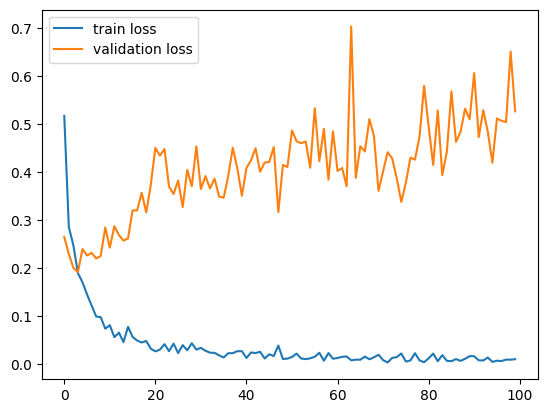

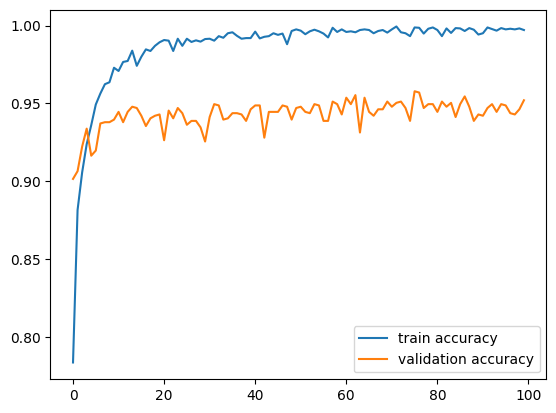

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

### Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2.imshow('Input Image', input_image)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')